In [1]:
import pandas as pd
df = pd.read_csv('/content/populationgroup-wise-deposits.csv')

In [2]:
print("Initial data preview:")
print(df.head())

Initial data preview:
   id  year                   state_name  state_code  \
0   0  2022  Andaman and Nicobar Islands          35   
1   1  2022  Andaman and Nicobar Islands          35   
2   2  2022  Andaman and Nicobar Islands          35   
3   3  2022  Andaman and Nicobar Islands          35   
4   4  2022  Andaman and Nicobar Islands          35   

              district_name  district_code          region population_group  \
0  North and Middle Andaman            632  Eastern Region            Rural   
1            South Andamans            602  Eastern Region            Rural   
2            South Andamans            602  Eastern Region       Semi-urban   
3            South Andamans            602  Eastern Region            Urban   
4  North and Middle Andaman            632  Eastern Region            Rural   

   no_of_offices  no_of_accounts  deposit_amount  
0             10             108             729  
1             13             106             775  
2            

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.dropna(how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

In [4]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
id                  0
year                0
state_name          0
state_code          0
district_name       0
district_code       0
region              0
population_group    0
no_of_offices       0
no_of_accounts      0
deposit_amount      0
dtype: int64


In [5]:
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-5-3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [6]:
for col in df.columns:
    if 'date' in col or 'year' in col:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    elif df[col].dtype == object:
        try:
            df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')
        except:
            pass

In [7]:
print("\nCleaned data preview:")
print(df.head())
print("\nData types:")
print(df.dtypes)


Cleaned data preview:
   id                          year  state_name  state_code  district_name  \
0   0 1970-01-01 00:00:00.000002022         NaN          35            NaN   
1   1 1970-01-01 00:00:00.000002022         NaN          35            NaN   
2   2 1970-01-01 00:00:00.000002022         NaN          35            NaN   
3   3 1970-01-01 00:00:00.000002022         NaN          35            NaN   
4   4 1970-01-01 00:00:00.000002022         NaN          35            NaN   

   district_code  region  population_group  no_of_offices  no_of_accounts  \
0            632     NaN               NaN             10             108   
1            602     NaN               NaN             13             106   
2            602     NaN               NaN             10              64   
3            602     NaN               NaN             36             301   
4            632     NaN               NaN              0               0   

   deposit_amount  
0             729  
1    

In [27]:
df.to_csv('cleaned_populationgroup-wise-deposits.csv', index=False)

In [28]:
df = pd.read_csv("/content/populationgroup-wise-deposits.csv")
print("First 5 rows:")
print(df.head())

First 5 rows:
   id  year                   state_name  state_code  \
0   0  2022  Andaman and Nicobar Islands          35   
1   1  2022  Andaman and Nicobar Islands          35   
2   2  2022  Andaman and Nicobar Islands          35   
3   3  2022  Andaman and Nicobar Islands          35   
4   4  2022  Andaman and Nicobar Islands          35   

              district_name  district_code          region population_group  \
0  North and Middle Andaman            632  Eastern Region            Rural   
1            South Andamans            602  Eastern Region            Rural   
2            South Andamans            602  Eastern Region       Semi-urban   
3            South Andamans            602  Eastern Region            Urban   
4  North and Middle Andaman            632  Eastern Region            Rural   

   no_of_offices  no_of_accounts  deposit_amount  
0             10             108             729  
1             13             106             775  
2             10     

In [29]:
print("Dataset shape:", df.shape)

Dataset shape: (14037, 11)


In [30]:
print("Info:")
print(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14037 entries, 0 to 14036
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                14037 non-null  int64 
 1   year              14037 non-null  int64 
 2   state_name        14037 non-null  object
 3   state_code        14037 non-null  int64 
 4   district_name     14037 non-null  object
 5   district_code     14037 non-null  int64 
 6   region            14037 non-null  object
 7   population_group  14037 non-null  object
 8   no_of_offices     14037 non-null  int64 
 9   no_of_accounts    14037 non-null  int64 
 10  deposit_amount    14037 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.2+ MB
None


In [31]:
print(df.describe())

                 id          year    state_code  district_code  no_of_offices  \
count  14037.000000  14037.000000  14037.000000   14037.000000   14037.000000   
mean    7062.753224   2020.504310     18.226473     355.351500      43.268718   
std     4088.358741      1.117906      9.973987     205.731486     105.355999   
min        0.000000   2019.000000      1.000000       1.000000       0.000000   
25%     3524.000000   2020.000000      9.000000     169.000000       0.000000   
50%     7053.000000   2021.000000     19.000000     365.000000       0.000000   
75%    10601.000000   2022.000000     27.000000     528.000000      54.000000   
max    14159.000000   2022.000000     38.000000     734.000000    2807.000000   

       no_of_accounts  deposit_amount  
count    14037.000000    1.403700e+04  
mean       599.058844    4.189880e+03  
std       1577.467136    3.394547e+04  
min          0.000000    0.000000e+00  
25%          0.000000    0.000000e+00  
50%          0.000000    0.000

In [32]:
print(df.isnull().sum())

id                  0
year                0
state_name          0
state_code          0
district_name       0
district_code       0
region              0
population_group    0
no_of_offices       0
no_of_accounts      0
deposit_amount      0
dtype: int64


In [33]:
print("Unique years:", df['year'].unique())
print("Unique states:", df['state_name'].nunique())
print("Unique regions:", df['region'].unique())
print("Unique population groups:", df['population_group'].unique())

Unique years: [2022 2021 2020 2019]
Unique states: 36
Unique regions: ['Eastern Region' 'Southern Region' 'North Eastern Region'
 'Northern Region' 'Central Region' 'Western Region']
Unique population groups: ['Rural' 'Semi-urban' 'Urban' 'Metropolitan']


In [34]:
yearly_summary = df.groupby('year')[['no_of_accounts', 'deposit_amount']].sum().reset_index()
print("Year-wise summary:")
print(yearly_summary)

Year-wise summary:
   year  no_of_accounts  deposit_amount
0  2019         1971294        12633468
1  2020         2067668        13736062
2  2021         2115789        15439619
3  2022         2254238        17004196


In [35]:
pop_group_summary = df.groupby('population_group')[['no_of_accounts', 'deposit_amount']].sum().reset_index()
print("Population group-wise summary:")
print(pop_group_summary)

Population group-wise summary:
  population_group  no_of_accounts  deposit_amount
0     Metropolitan         1603527        30376771
1            Rural         2870898         6320315
2       Semi-urban         2509302         9558993
3            Urban         1425262        12557266


In [36]:
state_summary = df.groupby('state_name')[['no_of_accounts', 'deposit_amount']].sum().reset_index()
top_states = state_summary.sort_values(by='deposit_amount', ascending=False).head(10)
print("Top 10 states by deposit amount:")
print(top_states)

Top 10 states by deposit amount:
       state_name  no_of_accounts  deposit_amount
19    Maharashtra          862334        12070696
7           Delhi          213800         5328501
33  Uttar Pradesh         1140724         4858454
14      Karnataka          523391         4634172
29     Tamil Nadu          601010         3823924
35    West Bengal          631047         3474157
9         Gujarat          415577         3172466
15         Kerala          309625         2318641
30      Telangana          283437         2200444
10        Haryana          220606         2037910


In [37]:
correlation = df[['no_of_offices', 'no_of_accounts', 'deposit_amount']].corr()
print("Correlation matrix:")
print(correlation)

Correlation matrix:
                no_of_offices  no_of_accounts  deposit_amount
no_of_offices        1.000000        0.925779        0.747999
no_of_accounts       0.925779        1.000000        0.773110
deposit_amount       0.747999        0.773110        1.000000


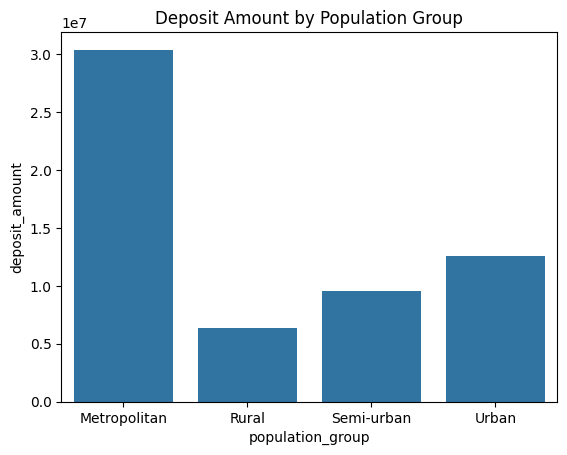

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='population_group', y='deposit_amount', data=pop_group_summary)
plt.title("Deposit Amount by Population Group")
plt.show()

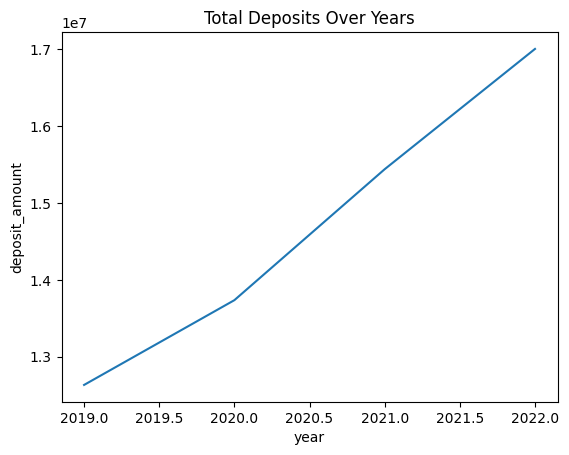

In [39]:
sns.lineplot(x='year', y='deposit_amount', data=yearly_summary)
plt.title("Total Deposits Over Years")
plt.show()

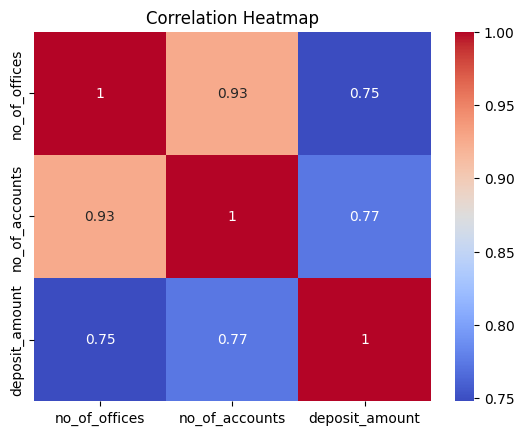

In [40]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-41-1686232225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='deposit_amount', y='region', data=region_summary, palette='viridis')


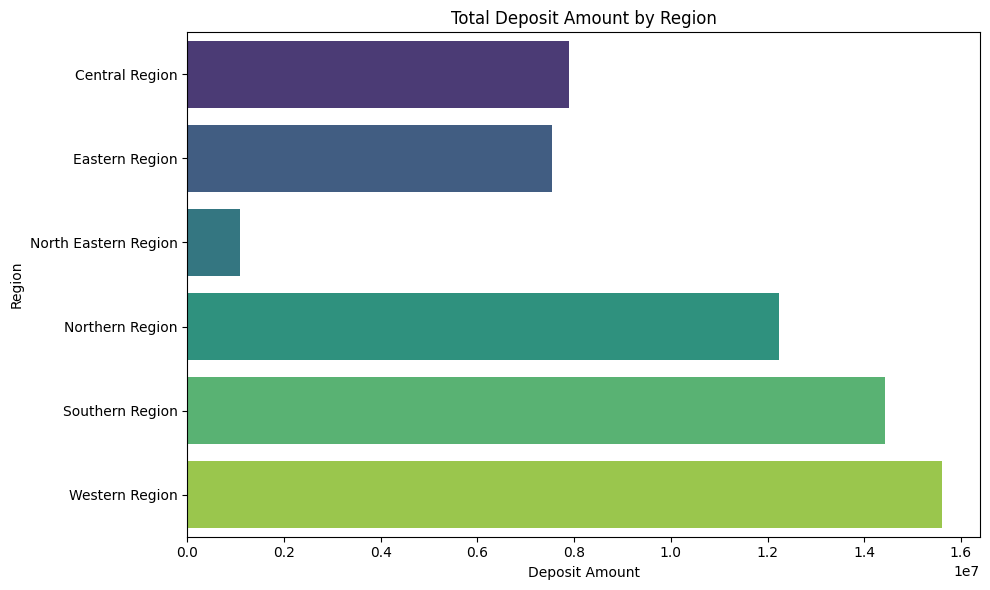

In [41]:
region_summary = df.groupby('region')[['deposit_amount']].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='deposit_amount', y='region', data=region_summary, palette='viridis')
plt.title("Total Deposit Amount by Region")
plt.xlabel("Deposit Amount")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

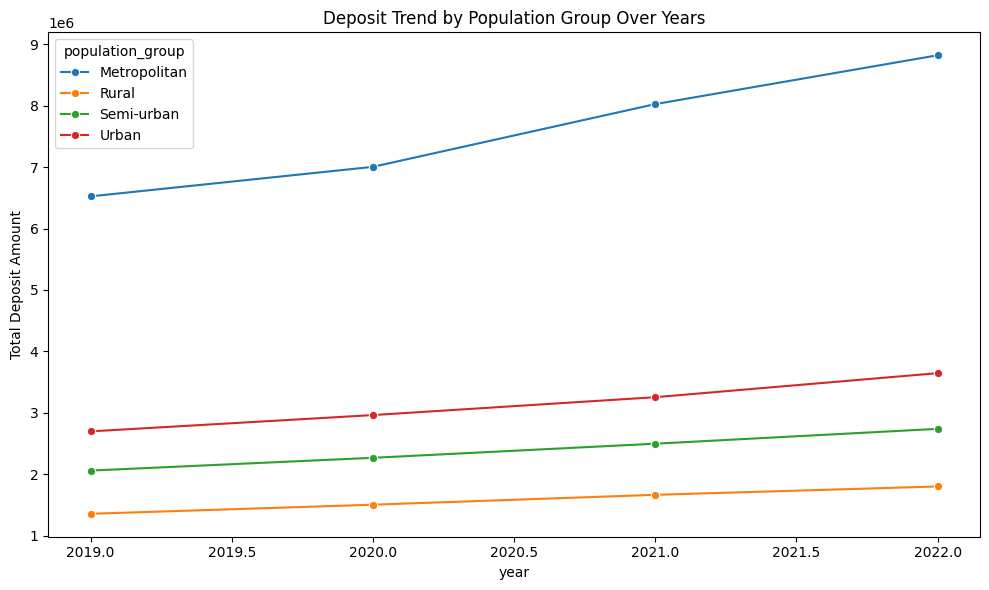

In [42]:
pop_year = df.groupby(['year', 'population_group'])['deposit_amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='deposit_amount', hue='population_group', data=pop_year, marker="o")
plt.title("Deposit Trend by Population Group Over Years")
plt.ylabel("Total Deposit Amount")
plt.tight_layout()
plt.show()

/tmp/ipython-input-43-2210797752.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='district_name', x='deposit_amount', data=top_districts, palette='mako')


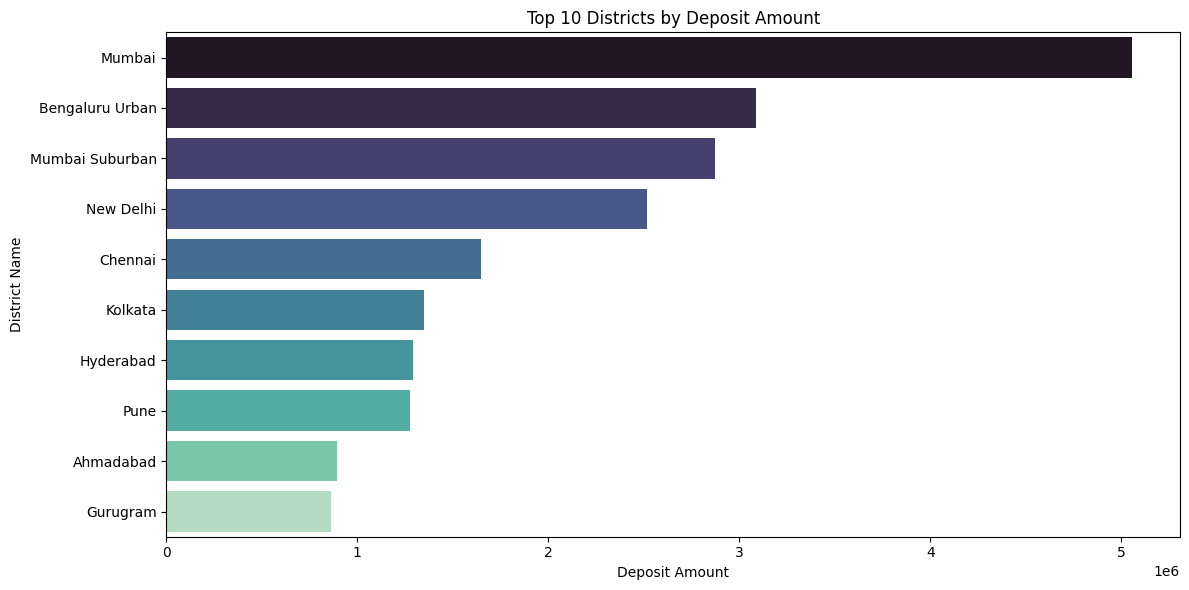

In [43]:
district_summary = df.groupby('district_name')['deposit_amount'].sum().reset_index()
top_districts = district_summary.sort_values(by='deposit_amount', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y='district_name', x='deposit_amount', data=top_districts, palette='mako')
plt.title("Top 10 Districts by Deposit Amount")
plt.xlabel("Deposit Amount")
plt.ylabel("District Name")
plt.tight_layout()
plt.show()

/tmp/ipython-input-44-1581365763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='population_group', y='deposit_amount', data=df, palette='Set2')


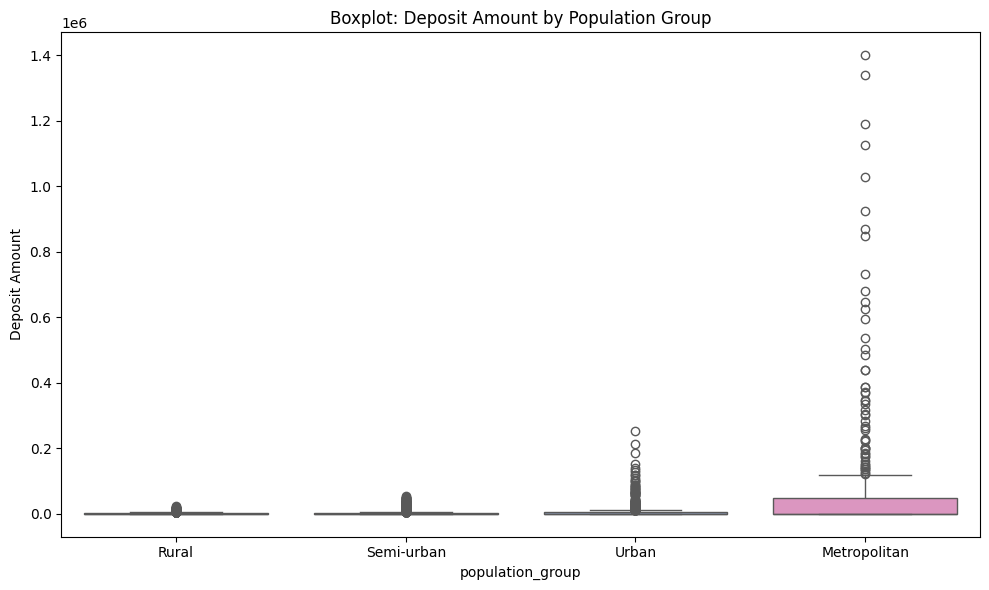

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='population_group', y='deposit_amount', data=df, palette='Set2')
plt.title("Boxplot: Deposit Amount by Population Group")
plt.ylabel("Deposit Amount")
plt.tight_layout()
plt.show()

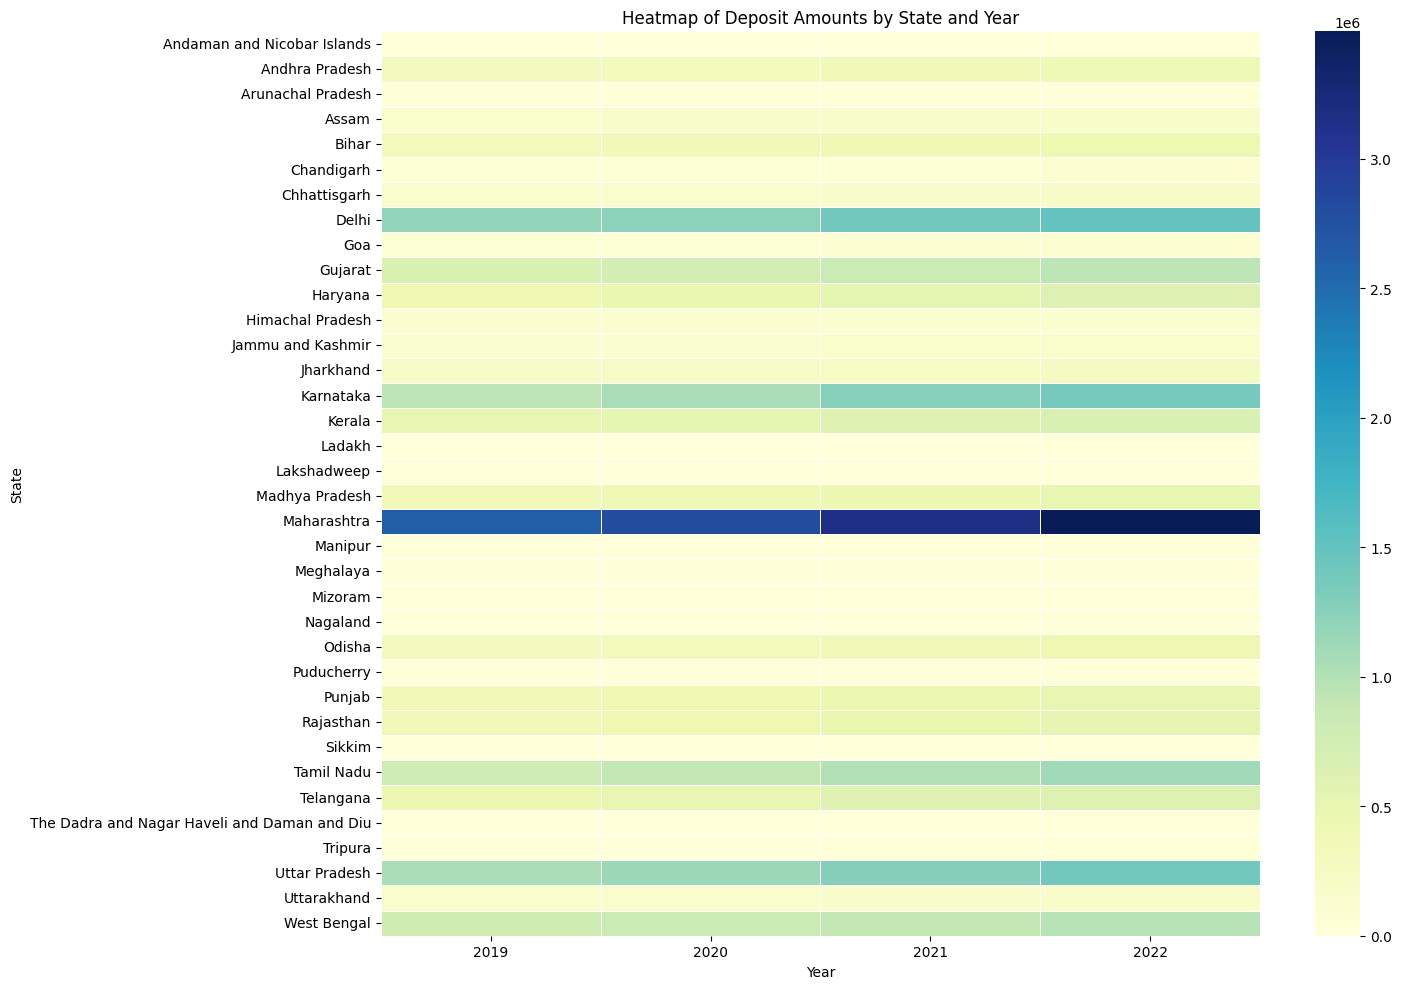

In [45]:
heatmap_data = df.groupby(['state_name', 'year'])['deposit_amount'].sum().unstack()
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Deposit Amounts by State and Year")
plt.xlabel("Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# 5. Outline of Proposed Machine Learning Algorithms

Building upon the initial insights gained from the Exploratory Data Analysis, this section outlines potential machine learning tasks and suitable algorithms that could be applied to the **"Population Group-wise Deposits"** dataset. These proposals aim to leverage the data for predictive modeling, forecasting, or segmentation, thereby extracting deeper value and actionable insights.

---

## 5.1 Predicting Deposit Amount (Regression Task)

**Goal:**  
To forecast the `deposit_amount` for specific regions, population groups, or time periods based on other available features.  
This could help financial institutions in strategic planning, resource allocation, and identifying high-potential areas.

**Features:**  
- year  
- state_name  
- district_name  
- region  
- population_group  
- no_of_offices  
- no_of_accounts  

*Note: Categorical features would require encoding (e.g., One-Hot Encoding).*

**Proposed Algorithms:**

- **Linear Regression**:  
  As a baseline model, it can provide a simple, interpretable relationship between features and deposit amounts.

- **Random Forest Regressor**:  
  Effective for capturing non-linear relationships and interactions between features, robust to outliers, and provides feature importance scores.

- **Gradient Boosting Regressors (e.g., XGBoost, LightGBM)**:  
  Known for high accuracy and performance in tabular data, capable of handling complex patterns and large datasets.

- **Support Vector Regressor (SVR)**:  
  Can be effective in high-dimensional spaces and for capturing non-linear relationships, especially with appropriate kernel functions.

---

## 5.2 Time Series Forecasting of Deposits

**Goal:**  
To predict future trends in `deposit_amount` or `no_of_accounts` for specific geographical segments or population groups.  
Given the `year` column, this dataset is well-suited for time series analysis to understand future financial behavior.

**Features:**  
- Historical `deposit_amount`, `no_of_accounts`, and `no_of_offices`  
- Temporal features derived from `year` (e.g., lagged values, rolling averages)

**Proposed Algorithms:**

- **ARIMA / SARIMA**:  
  Traditional statistical models suitable for capturing autoregressive, integrated, and moving average components in time series data, including seasonality (SARIMA).

- **Prophet (by Facebook)**:  
  A robust forecasting tool that handles seasonality, trends, and holidays effectively, making it suitable for business time series data.

- **Recurrent Neural Networks (RNNs) / LSTMs**:  
  For more complex, long-term dependencies in the time series, especially if a sufficiently large and detailed historical sequence is available.

---

## 5.3 Clustering of Regions/Population Groups (Unsupervised Learning)

**Goal:**  
To identify natural groupings or segments of states, districts, or population groups based on their deposit characteristics  
(e.g., high-growth vs. stagnant, rural vs. urban deposit patterns).  
This can help in targeted policy-making, resource allocation, or marketing strategies.

**Features:**  
- Normalized numerical features such as `deposit_amount`, `no_of_accounts`, `no_of_offices`  
- Potentially aggregated over time or by location

**Proposed Algorithms:**

- **K-Means Clustering**:  
  A simple and widely used algorithm for partitioning data into a predefined number of clusters based on feature similarity.

- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:  
  Useful for discovering clusters of varying shapes and sizes in a dataset with noise (outliers).

- **Hierarchical Clustering**:  
  Can provide a dendrogram, illustrating the hierarchical relationships between clusters,  
  which can be useful for exploring different levels of granularity in segmentation.

---

*These proposed models represent potential avenues for further analysis. Prior to implementation, extensive feature engineering, hyperparameter tuning, and rigorous model evaluation would be necessary to select the most appropriate and effective algorithm for each specific task.*
